# Práctica 2

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv('./Dataset_lab04/diabetes.csv')
df

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...                 ...     ...       ...        ...   ...     ...     ...   
253675              0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676              1.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677              0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678              0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679              1.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                        0.0           0.0     0.0  ...            1.0   
1                        0.0           1.0     0.0  ...            0.0   
2                        0.0           0.0     1.0  ...            1.0   
3                        0.0           1.0     1.0  ...            1.0   
4                        0.0           1.0     1.0  ...            1.0   
...                      ...           ...     ...  ...            ...   
253675                   0.0           0.0     1.0  ...            1.0   
253676                   0.0           0.0     0.0  ...            1.0   
253677                   0.0           1.0     1.0  ...            1.0   
253678                   0.0           0.0     1.0  ...            1.0   
253679                   1.0           1.0     1.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
0               0.0      5.0      18.0      15.0       1.0  0.0   9.0   
1               1.0      3.0       0.0       0.0       0.0  0.0   7.0   
2               1.0      5.0      30.0      30.0       1.0  0.0   9.0   
3               0.0      2.0       0.0       0.0       0.0  0.0  11.0   
4               0.0      2.0       3.0       0.0       0.0  0.0  11.0   
...             ...      ...       ...       ...       ...  ...   ...   
253675          0.0      3.0       0.0       5.0       0.0  1.0   5.0   
253676          0.0      4.0       0.0       0.0       1.0  0.0  11.0   
253677          0.0      1.0       0.0       0.0       0.0  0.0   2.0   
253678          0.0      3.0       0.0       0.0       0.0  1.0   7.0   
253679          0.0      2.0       0.0       0.0       0.0  0.0   9.0   

        Education  Income  
0             4.0     3.0  
1             6.0     1.0  
2             4.0     8.0  
3             3.0     6.0  
4             5.0     4.0  
...           ...     ...  
253675        6.0     7.0  
253676        2.0     4.0  
253677        5.0     2.0  
253678        5.0     1.0  
253679        6.0     2.0  

[253680 rows x 22 columns]

## Vamos a predecir la probabilidad de que tenga diabetes en base al IMC

In [39]:
# Preprocesamiento
# Seleccionar las columnas relevantes para el modelo
feature_cols = ['BMI']
X = df[feature_cols]
y = df['Diabetes_binary']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Regresión Logística
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Agregar las predicciones al DataFrame original
df['Diabetes_pred'] = model.predict(X)


# Explorar los datos
print(df.head())  # Mostrar las primeras filas del DataFrame
print(df.dtypes)  # Verificar los tipos de datos de las columnas
print(df.isnull().sum())  # Verificar si hay valores faltantes

#  Preprocesamiento de datos
df = df.dropna(subset=["BMI", "Diabetes_pred"])  # Eliminar filas con valores faltantes en BMI y DiabetesResult

# Realizamos el diagrama de dispersión

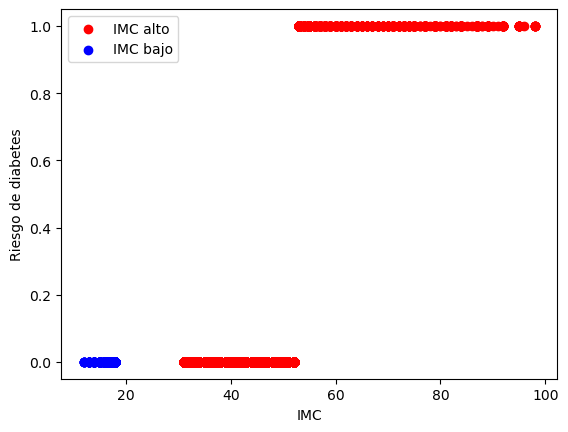

In [40]:
# Diagrama de dispersión
high_bmi = df[df["BMI"] > 30]  # Filtrar filas con un IMC alto (mayor a 30)
low_bmi = df[df["BMI"] < 18.5]  # Filtrar filas con un IMC bajo (menor a 18.5)

plt.scatter(high_bmi["BMI"], high_bmi["Diabetes_pred"], c="red", label="IMC alto")
plt.scatter(low_bmi["BMI"], low_bmi["Diabetes_pred"], c="blue", label="IMC bajo")
plt.xlabel("IMC")
plt.ylabel("Riesgo de diabetes")
plt.legend()
plt.show()

Interpretación: Podemos observar que para un IMC bajo (menor que 20) no existe riesgo de diabetes (se registra como 0). Sin embargo, a medida que aumenta el IMC, también aumenta el riesgo de diabetes. Aunque se observa un riesgo de diabetes en el rango de IMC entre 30 y 50, no está asegurado, pero a partir de 50, sí existe un alto riesgo de desarrollar diabetes.

## Preprocesamiento Colesterol

   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  GenHlth  MentHlth  \
0                   0.0           0.0     0.0  ...      5.0      18.0   
1                   0.0           1.0     0.0  ...      3.0       0.0   
2                   0.0           0.0     1.0  ...      5.0      30.0   
3                   0.0           1.0     1.0  ...      2.0       0.0   
4                   0.0           1.0     1.0  ...      2.0       3.0   

   PhysHlth  DiffWalk  Sex   Age  Education  Income  Diabetes_pred  \
0      15.0       1.0  0.0   9.0        4.0     3.0 

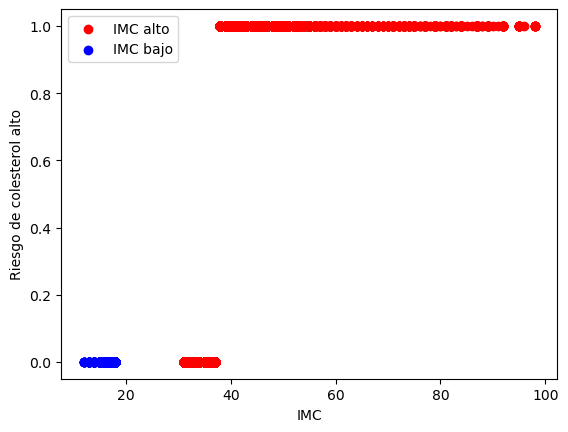

In [43]:

# Paso 2: Preprocesamiento de datos para predecir el riesgo de colesterol alto
feature_cols = ['BMI']
X = df[feature_cols]
y = df['HighChol']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Regresión Logística
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Agregar las predicciones al DataFrame original
df['Cholesterol_pred'] = model.predict(X)

# Paso 3: Explorar los datos
print(df.head())  # Mostrar las primeras filas del DataFrame
print(df.dtypes)  # Verificar los tipos de datos de las columnas
print(df.isnull().sum())  # Verificar si hay valores faltantes

# Paso 4: Preprocesamiento de datos
df = df.dropna(subset=["BMI", "Cholesterol_pred"])  # Eliminar filas con valores faltantes en BMI y Cholesterol_pred

# Paso 5: Diagrama de dispersión
high_bmi = df[df["BMI"] > 30]  # Filtrar filas con un IMC alto (mayor a 30)
low_bmi = df[df["BMI"] < 18.5]  # Filtrar filas con un IMC bajo (menor a 18.5)

plt.scatter(high_bmi["BMI"], high_bmi["Cholesterol_pred"], c="red", label="IMC alto")
plt.scatter(low_bmi["BMI"], low_bmi["Cholesterol_pred"], c="blue", label="IMC bajo")
plt.xlabel("IMC")
plt.ylabel("Riesgo de colesterol alto")
plt.legend()
plt.show()

Interpretación: Podemos observar que para un IMC bajo (menor que 20) no existe riesgo de colesterol alto (se registra como 0). Sin embargo, a medida que aumenta el IMC, también aumenta el riesgo de colesterol alto. Aunque se observa un riesgo de colesterol alto en el rango de IMC entre 30 y 40, no está asegurado, pero a partir de 40, sí existe un alto riesgo de desarrollar colesterol alto.

## Apartado C)

El IMC alto generalmente indica un exceso de peso, lo que puede aumentar el riesgo de desarrollar diversas enfermedades crónicas, como la diabetes y el colesterol alto.

Al observar el diagrama de dispersión, podemos identificar patrones claros. A partir de un IMC superior a 30, se observa un incremento significativo en el riesgo de colesterol alto. Esto indica que las personas con un IMC alto tienen una mayor probabilidad de presentar niveles elevados de colesterol en comparación con aquellas con un IMC más bajo.

Además, se destaca que a partir de un IMC de 40 o más, la posibilidad de tener tanto diabetes como colesterol alto es extremadamente alta. Estos resultados sugieren una fuerte asociación entre el IMC elevado, la diabetes y el colesterol alto.

Es fundamental mantener un estilo de vida saludable, que incluya una alimentación equilibrada y la práctica regular de ejercicio, para prevenir y controlar el riesgo de diabetes y colesterol alto.